In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import random
%matplotlib inline

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


iris dataとは、3種類のアヤメ(iris)の品種データです。Setosa、Versicolor、Virginicaの3種類のアヤメについて、それぞれ150個体ずつ測定したデータが入っています。測定項目は、

Sepal Length（がく片の長さ）  
Sepal Width（がく片の幅）  
Petal Length（花弁（花びら）の長さ）  
Petal Width（花弁（花びら）の幅）  

In [4]:
#列ごとに統計量を確認してみましょう。
data.describe()

#count: 要素の個数
#unique: ユニークな（一意な）値の要素の個数
#top: 最頻値（mode）
#freq: 最頻値の頻度（出現回数）
#mean: 算術平均
#std: 標準偏差
#min: 最小値
#max: 最大値
#50%: 中央値（median）
#25%, 75%: 1/4分位数、3/4分位数

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#種類ごとの統計量も計算してみましょう
data.groupby('species').describe()

petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max   
species                                                                
setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal_width        ...  sepal_length      sepal_width         \
                 count   mean ...           75%  max       count   mean   
species                       ...                                         
setosa            50.0  0.244 ...           5.2  5.8        50.0  3.418   
versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                   
                 std  min    25%  50%    75%  max  
species                                            
setosa      0.381024  2.3  3.125  3.4  3.675  4.4  
versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

In [6]:
#これらを品種ごとに分けておきます。
setosa = data.query("species == 'setosa'")
versicolor = data.query("species == 'versicolor'")
virginica = data.query("species == 'virginica'")

In [7]:
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'count')

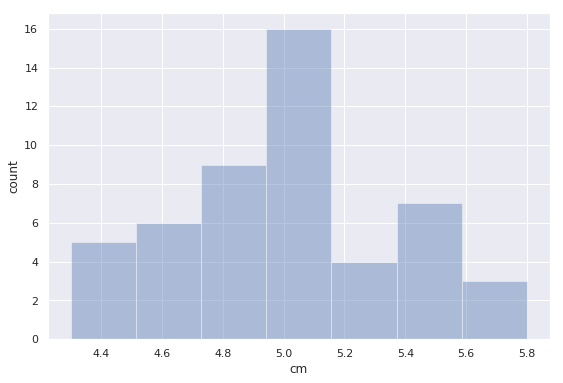

In [20]:
# figsizeは描画エリアの大きさ(縦,横)
fig, ax = plt.subplots(figsize = (9,6)) 
sns.distplot(setosa['sepal_length'], kde = False)
ax.set_xlabel('cm')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

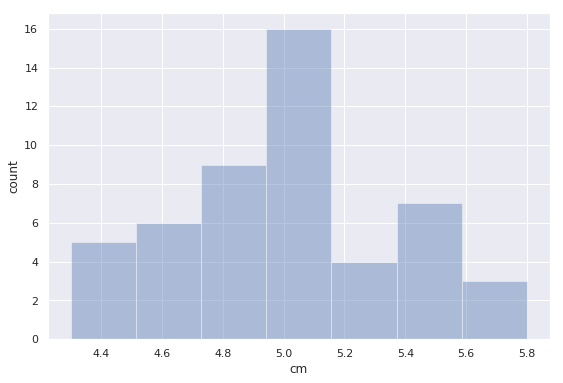

In [17]:
sns.set()  # seabornデフォルトのスタイルシート適用

fig, ax = plt.subplots(figsize = (9,6)) 
sns.distplot(setosa['sepal_length'], kde = False)
ax.set_xlabel('cm')
ax.set_ylabel('count')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'cm')

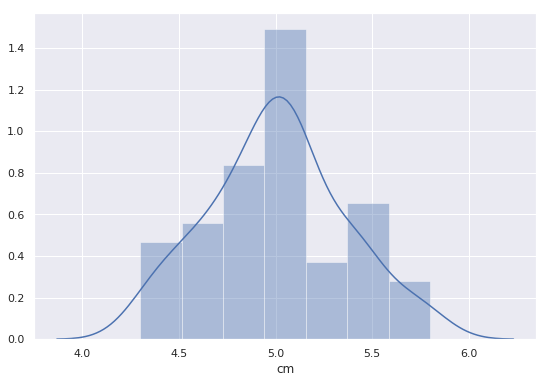

In [21]:
# 次に、このヒストグラムに確率分布を上書きできます。こちらもLesson4で一度学習しましたね。

fig, ax = plt.subplots(figsize = (9,6)) 
sns.distplot(setosa['sepal_length'], kde=True)
ax.set_xlabel('cm')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'cm')

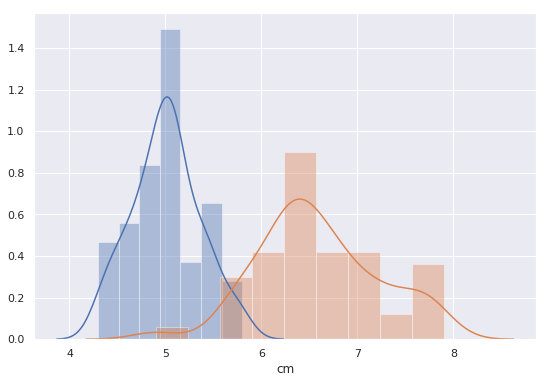

In [28]:
fig, ax = plt.subplots(figsize = (9,6)) 
sns.distplot(setosa['sepal_length'])
sns.distplot(virginica['sepal_length'])
ax.set_xlabel('cm')

### 4.棒グラフ

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


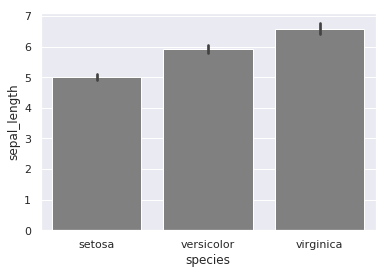

In [29]:
sns.barplot(x='species', y='sepal_length', data=data, color='grey')

### 5.箱ヒゲ図

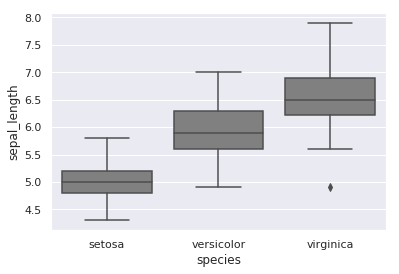

In [30]:
sns.boxplot(x='species', y='sepal_length', data=data, color='gray')

### 6.バイオリンプロット

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


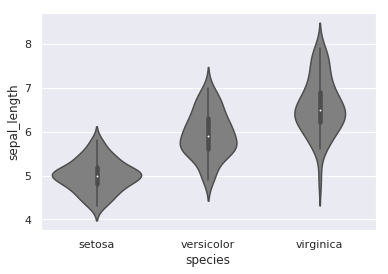

In [31]:
sns.violinplot(x='species', y='sepal_length', data=data, color='gray')

###  7.散布図

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


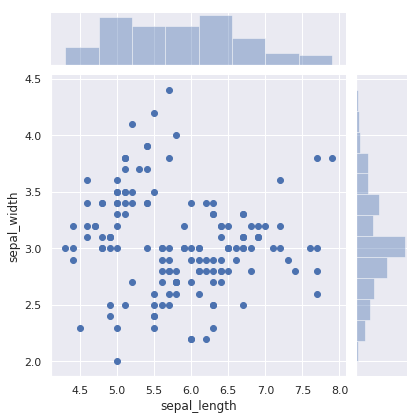

In [32]:
sns.jointplot(x='sepal_length', y='sepal_width', data =data)

### 8.ペアプロット

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


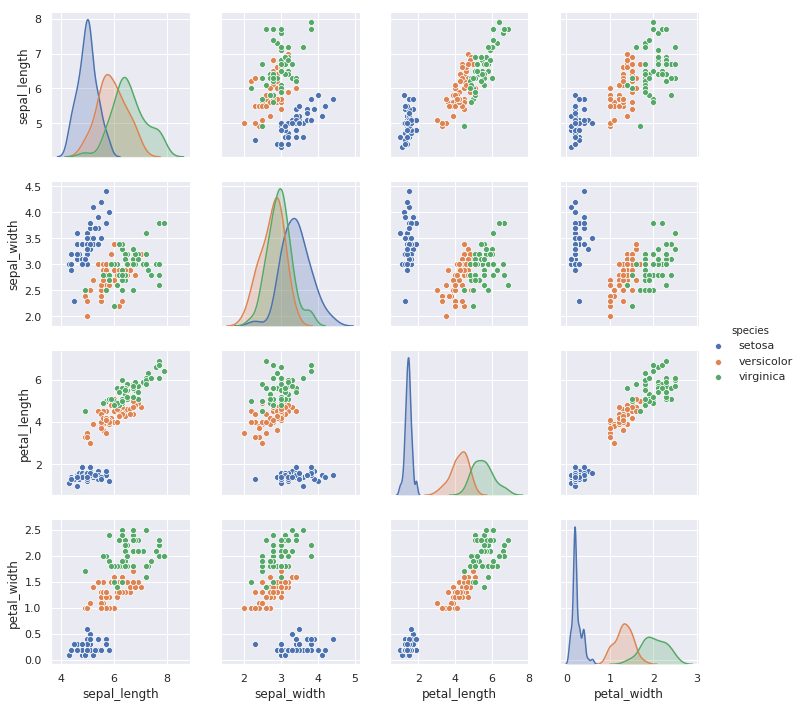

In [33]:
sns.pairplot(data, hue='species')